In [1]:
import cv2
import matplotlib.pyplot as plt

twix = cv2.imread("twix.jpg")
cho = cv2.imread("chocolates.jpg")

In [2]:
# orb tanımlayıcı
# köşe-kenar gibi nesneye ait özellikler
orb = cv2.ORB_create()

In [3]:
# anahtar nokta tespiti
kp1, des1 = orb.detectAndCompute(twix,None) #None = mask
kp2, des2 = orb.detectAndCompute(cho,None)

In [4]:
#bf matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

In [5]:
#noktaları eşleştir
matches = bf.match(des1,des2)

In [6]:
#mesafeye göre sırala
matches = sorted(matches, key = lambda x: x.distance)


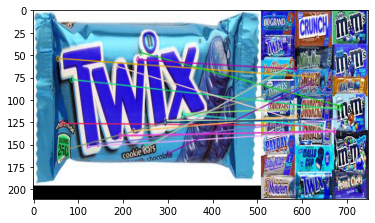

In [7]:
#eşleşen resimleri görselleştirme
plt.figure()
img_match = cv2.drawMatches(twix,kp1,cho,kp2,matches[:20],None,flags=2)
plt.imshow(img_match,aspect=2)

#### Yukarıdaki ORB kötü sonuç verdi.

#### SİFT Metodu

In [9]:
sift = cv2.SIFT_create()


In [10]:
#bf
bf = cv2.BFMatcher()

In [11]:
#anahtar nokta tespiti sift ile
kp1,des1 = sift.detectAndCompute(twix,None)
kp2,des2 = sift.detectAndCompute(cho,None)

In [12]:
matches = bf.knnMatch(des1,des2,k=2) #ilk sütun en iyi eşleşme 2.sütun 2. vs. k=2 yani ilk 2 sütun seçildi

(<matplotlib.image.AxesImage at 0x1fffa98ef40>,
 (-0.5, 747.5, 210.5, -0.5),
 Text(0.5, 1.0, 'SIFT'))

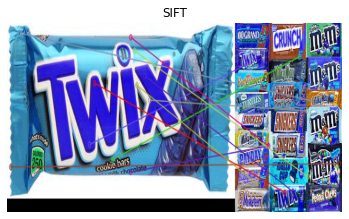

In [20]:
guzel_eslesme = []

for match1,match2 in matches:
    if match1.distance <0.75*match2.distance:
        guzel_eslesme.append([match1])
    
plt.figure()
sift_matches = cv2.drawMatchesKnn(twix,kp1,cho,kp2,guzel_eslesme,None,flags=2)
plt.imshow(sift_matches,aspect=2),plt.axis("off"),plt.title("SIFT")